In [70]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor

In [71]:
df = pd.read_csv('Merged_data.csv', index_col=False)
df

,workload,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,IpMispredict,BpTkBranch,MLP,SPEC_speed_score
0,500.perlbench_r,8161831361,25741624,19244473297,1661700474,34112016,11,240354,98.45,3.64,439.30,2.03,1.39,1.000000
1,500.perlbench_r,16524592463,51543983,39867315327,3238937052,74501671,19,395540,108.91,3.65,400.45,2.05,1.36,1.000000
2,500.perlbench_r,24845507433,78831602,60442673577,4837212858,114823505,34,552608,112.42,3.65,389.37,2.06,1.35,1.000000
3,500.perlbench_r,33099307131,104275450,81237734926,6379915775,155716591,42,705694,114.11,3.65,383.99,2.07,1.35,1.000000
4,500.perlbench_r,41358873306,130200148,101910825510,7948209890,195524777,50,868384,115.31,3.65,399.80,2.07,1.36,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13225,554.roms_r,1656124876334,46950381286,1455944521876,893714948016,445831654,2316,465612,208.79,2.18,3320.62,1.60,5.82,1.212946
13226,554.roms_r,1664176734600,47170795999,1463233119438,898035966313,447903470,2323,468423,208.91,2.18,3319.15,1.60,5.82,1.212946
13227,554.roms_r,1672220978116,47403733115,1469600086046,902527029497,449987320,2332,471534,208.81,2.18,3321.06,1.60,5.82,1.212946
13228,554.roms_r,1680264760294,47625731348,1477071885703,906791962979,452169497,2337,474207,209.03,2.18,3321.06,1.60,5.82,1.212946


In [72]:
df.columns

Index(['workload', 'cycles', 'cache-misses', 'instructions',
       'cycle_activity.stalls_total', 'branch-misses', 'context-switches',
       'iTLB-load-misses', 'IpCall', 'IpLoad', 'IpMispredict', 'BpTkBranch',
       'MLP', 'SPEC_speed_score'],
      dtype='object')

In [73]:
workloads={
    '500.perlbench_r': 0,
    '502.gcc_r': 1,
    '505.mcf_r': 2,
    '507.cactuBSSN_r': 3,
    '508.namd_r': 4,
    '510.parest_r': 5,
    '511.povray_r': 6,
    '519.lbm_r': 7,
    '520.omnetpp_r': 8,
    '523.xalancmbk_r': 9,
    '525.x264_r': 10,
    '526.blender_r': 11,
    '531.deepsjeng_r': 12,
    '538.imagick_r': 13,
    '541.leela_r': 14,
    '544.nab_r': 15,
    '548.exchange2_r': 16,
    '549.fotonik3d_r': 17,
    '554.roms_r': 18,
    '557.xz_r': 19,
    '503.bwaves_r': 20,
    '521.wrf_r': 21,
    '527.cam4_r': 22
}
df['wkld']=df['workload']
df=pd.get_dummies(df, columns=['wkld'])
df['workload']=df['workload'].astype('category').map(workloads)
df

,workload,cycles,cache-misses,instructions,cycle_activity.stalls_total,branch-misses,context-switches,iTLB-load-misses,IpCall,IpLoad,...,wkld_523.xalancmbk_r,wkld_526.blender_r,wkld_527.cam4_r,wkld_531.deepsjeng_r,wkld_538.imagick_r,wkld_541.leela_r,wkld_544.nab_r,wkld_548.exchange2_r,wkld_554.roms_r,wkld_557.xz_r
0,0,8161831361,25741624,19244473297,1661700474,34112016,11,240354,98.45,3.64,...,False,False,False,False,False,False,False,False,False,False
1,0,16524592463,51543983,39867315327,3238937052,74501671,19,395540,108.91,3.65,...,False,False,False,False,False,False,False,False,False,False
2,0,24845507433,78831602,60442673577,4837212858,114823505,34,552608,112.42,3.65,...,False,False,False,False,False,False,False,False,False,False
3,0,33099307131,104275450,81237734926,6379915775,155716591,42,705694,114.11,3.65,...,False,False,False,False,False,False,False,False,False,False
4,0,41358873306,130200148,101910825510,7948209890,195524777,50,868384,115.31,3.65,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13225,18,1656124876334,46950381286,1455944521876,893714948016,445831654,2316,465612,208.79,2.18,...,False,False,False,False,False,False,False,False,True,False
13226,18,1664176734600,47170795999,1463233119438,898035966313,447903470,2323,468423,208.91,2.18,...,False,False,False,False,False,False,False,False,True,False
13227,18,1672220978116,47403733115,1469600086046,902527029497,449987320,2332,471534,208.81,2.18,...,False,False,False,False,False,False,False,False,True,False
13228,18,1680264760294,47625731348,1477071885703,906791962979,452169497,2337,474207,209.03,2.18,...,False,False,False,False,False,False,False,False,True,False


In [74]:
wkll=['500.perlbench_r', '502.gcc_r', '503.bwaves_r', '505.mcf_r', '507.cactuBSSN_r', '508.namd_r', '510.parest_r', '511.povray_r', '519.lbm_r', '520.omnetpp_r', '521.wrf_r', '523.xalancmbk_r', '525.x264_r', '526.blender_r', '527.cam4_r', '531.deepsjeng_r', '538.imagick_r', '541.leela_r', '544.nab_r', '548.exchange2_r', '549.fotonik3d_r', '554.roms_r', '557.xz_r']


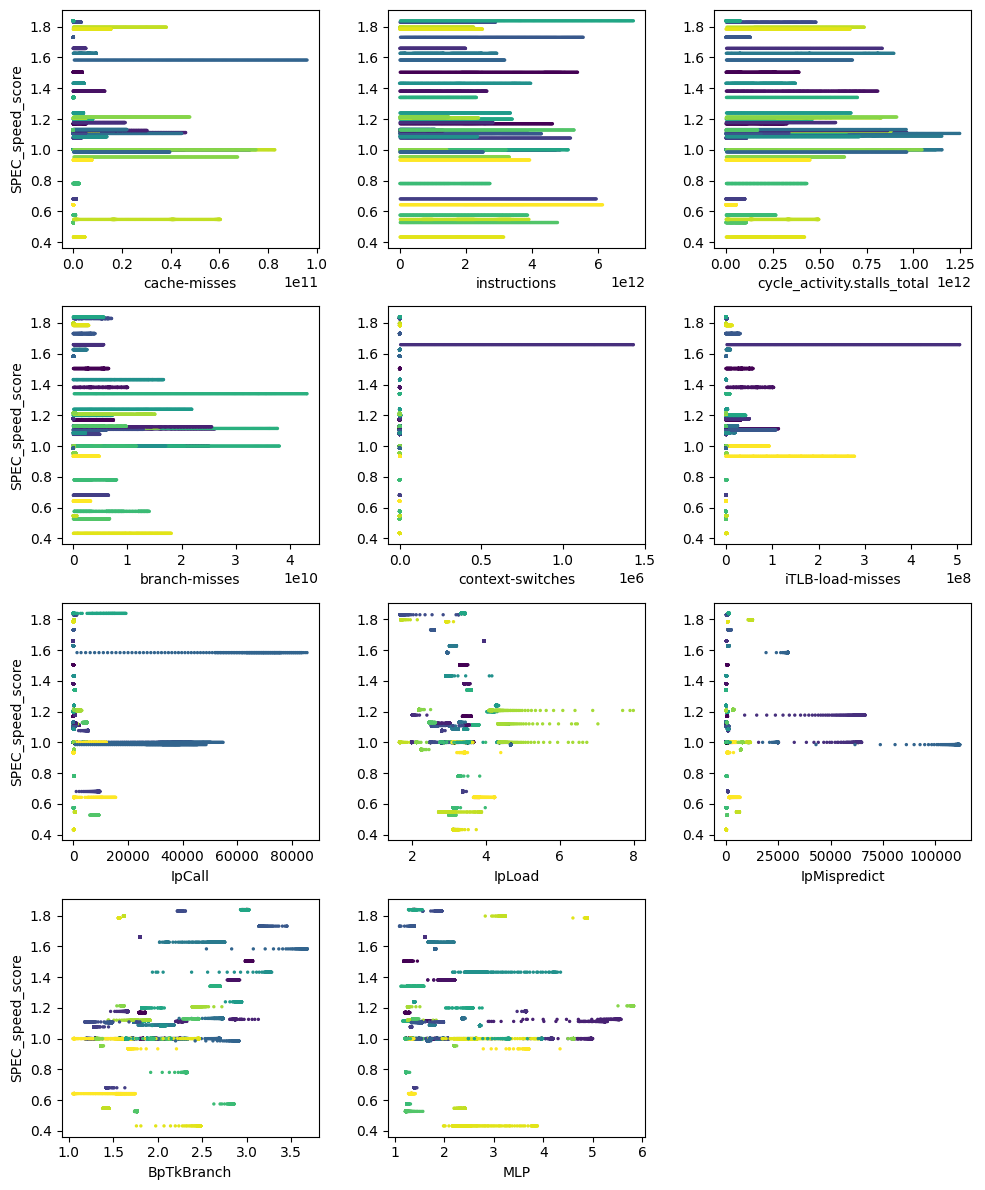

In [75]:
# Performance counters (columns of dataset) vs run-time plots

plt.figure(figsize=(10,12))
for i in range(2, 13):
    plt.subplot2grid((4, 3), ((i-2)//3, (i-2)%3))
    sc=plt.scatter(df[df.columns[i]], df['SPEC_speed_score'], 2, df['workload'])    # different colour for each workload
    #plt.legend(handles=sc.legend_elements(num=None)[0], labels=workloads.keys(), title="workload")
    plt.xlabel(df.columns[i])
    if i%3==2: plt.ylabel('SPEC_speed_score')
plt.tight_layout()
plt.show()

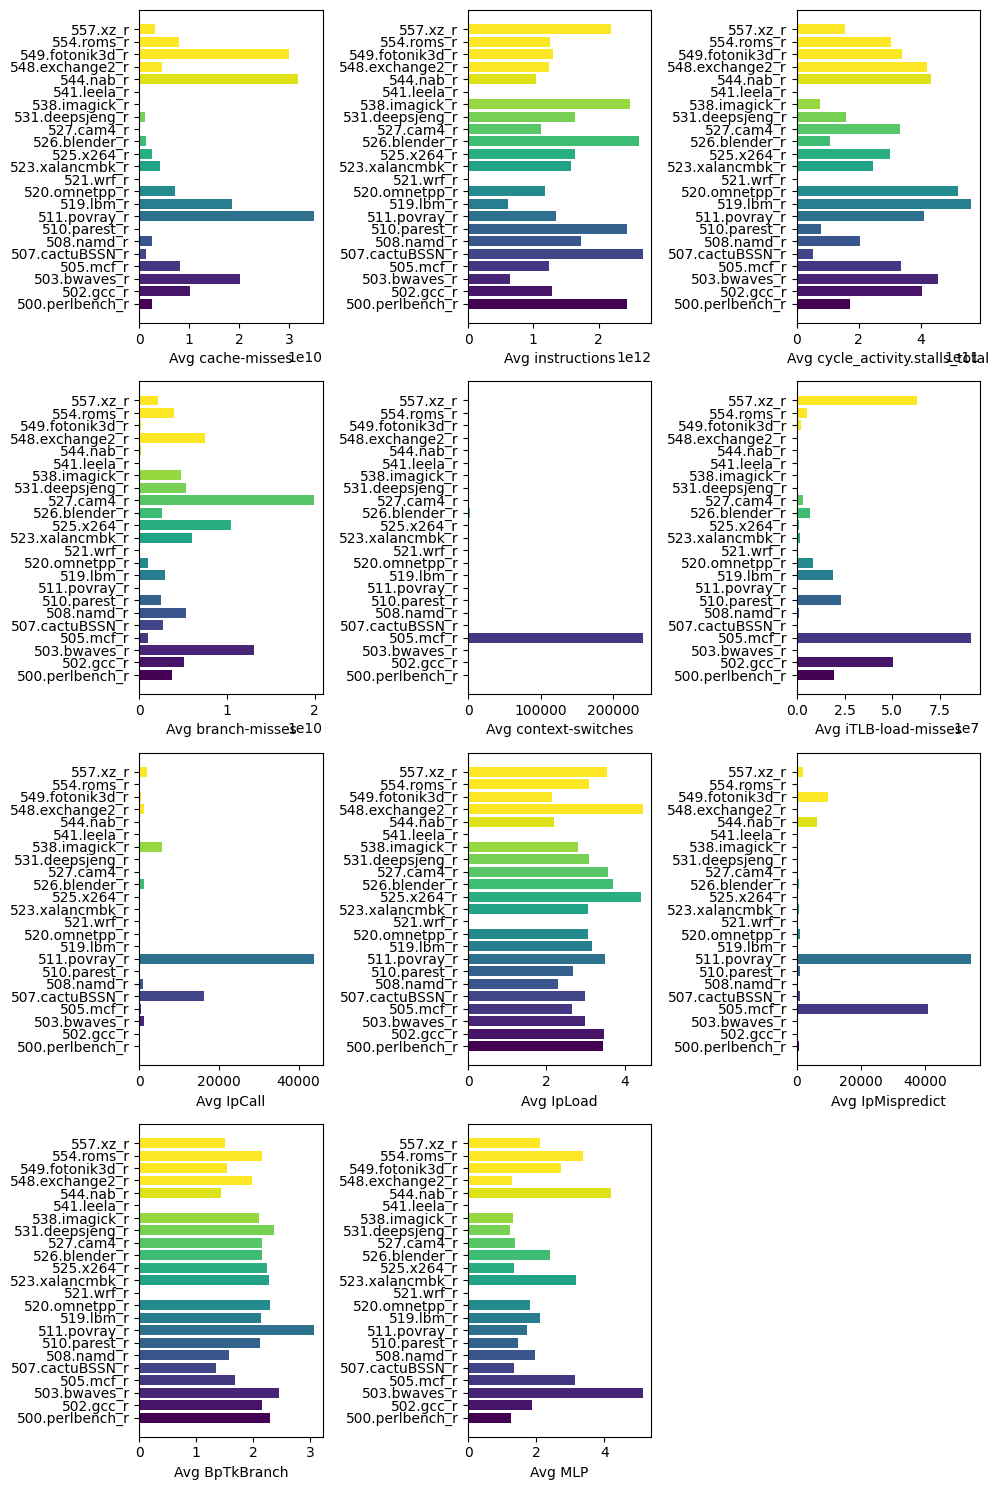

In [76]:
# Average performance counter values of each workload

cmap = mpl.colormaps['viridis']
norm = mpl.colors.Normalize(vmin=0, vmax=19)
plt.figure(figsize=(10,15))
for i in range(2, 13):
    plt.subplot2grid((4, 3), ((i-2)//3, (i-2)%3))
    plt.barh(np.arange(23), tick_label=wkll, width=[df.loc[df['workload']==j, df.columns[i]].mean() for j in range(23)], color=cmap(norm(range(23))))
    plt.xticks()
    plt.xlabel('Avg %s' % df.columns[i])

plt.tight_layout()
plt.show()

In [77]:
# Separating features and target into numpy arrays
print(np.array(df.loc[:,:'MLP']).shape)
print(df.loc[:,:'MLP'].columns)
X=np.array(df.loc[:, :'MLP']).reshape(-1,13)
print(np.array(df.drop(['SPEC_speed_score'], axis=1)).shape)
print(df.columns)
print(df.drop(['SPEC_speed_score'], axis=1).columns)
Xw=np.array(df.drop(['SPEC_speed_score'], axis=1)).reshape(-1, 34)         # has the workload col
y=np.array(df['SPEC_speed_score']).reshape(-1, 1)
print(Xw.shape)
print(y.shape)

(13230, 13)
Index(['workload', 'cycles', 'cache-misses', 'instructions',
       'cycle_activity.stalls_total', 'branch-misses', 'context-switches',
       'iTLB-load-misses', 'IpCall', 'IpLoad', 'IpMispredict', 'BpTkBranch',
       'MLP'],
      dtype='object')
(13230, 34)
Index(['workload', 'cycles', 'cache-misses', 'instructions',
       'cycle_activity.stalls_total', 'branch-misses', 'context-switches',
       'iTLB-load-misses', 'IpCall', 'IpLoad', 'IpMispredict', 'BpTkBranch',
       'MLP', 'SPEC_speed_score', 'wkld_500.perlbench_r', 'wkld_502.gcc_r',
       'wkld_503.bwaves_r', 'wkld_505.mcf_r', 'wkld_507.cactuBSSN_r',
       'wkld_508.namd_r', 'wkld_510.parest_r', 'wkld_511.povray_r',
       'wkld_519.lbm_r', 'wkld_520.omnetpp_r', 'wkld_521.wrf_r',
       'wkld_523.xalancmbk_r', 'wkld_526.blender_r', 'wkld_527.cam4_r',
       'wkld_531.deepsjeng_r', 'wkld_538.imagick_r', 'wkld_541.leela_r',
       'wkld_544.nab_r', 'wkld_548.exchange2_r', 'wkld_554.roms_r',
       'wkld_557.xz_r

Axis  Variance covered by PCA:
  1       19.797462
  2       16.614607
  3       13.778624
  4       13.032549
  5        9.173059
  6        7.862574
  7        5.483741
  8        4.774767
  9        3.808453
 10        3.021017
 11        1.385423
 12        1.151701
 13        0.116023


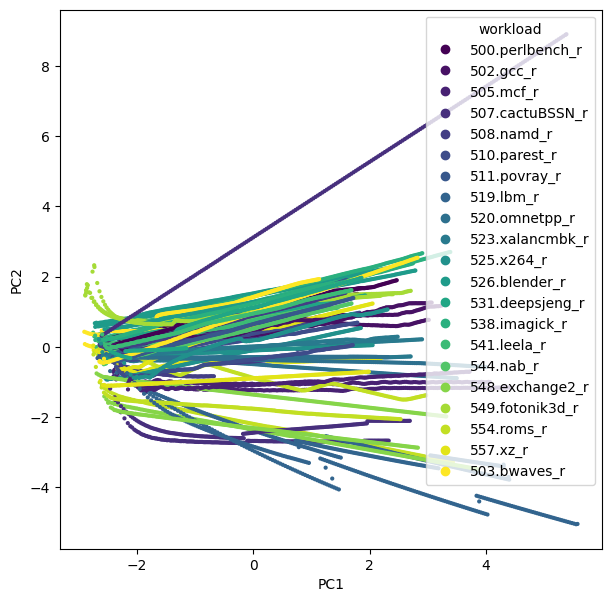

In [78]:
# Principal Component Analysis of the datapoints

scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)          # Z-transform all column values
pca=PCA(n_components=13)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print("Axis  Variance covered by PCA:")
for i in range(13): print('%3d %15f'%(i+1, pca.explained_variance_ratio_[i]*100))

plt.figure(figsize=(7,7))
scatter=plt.scatter(X_pca[:, 0], X_pca[:, 1], 4, df['workload'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(handles=scatter.legend_elements(num=None)[0], labels=workloads.keys(), title="workload", )
plt.show()

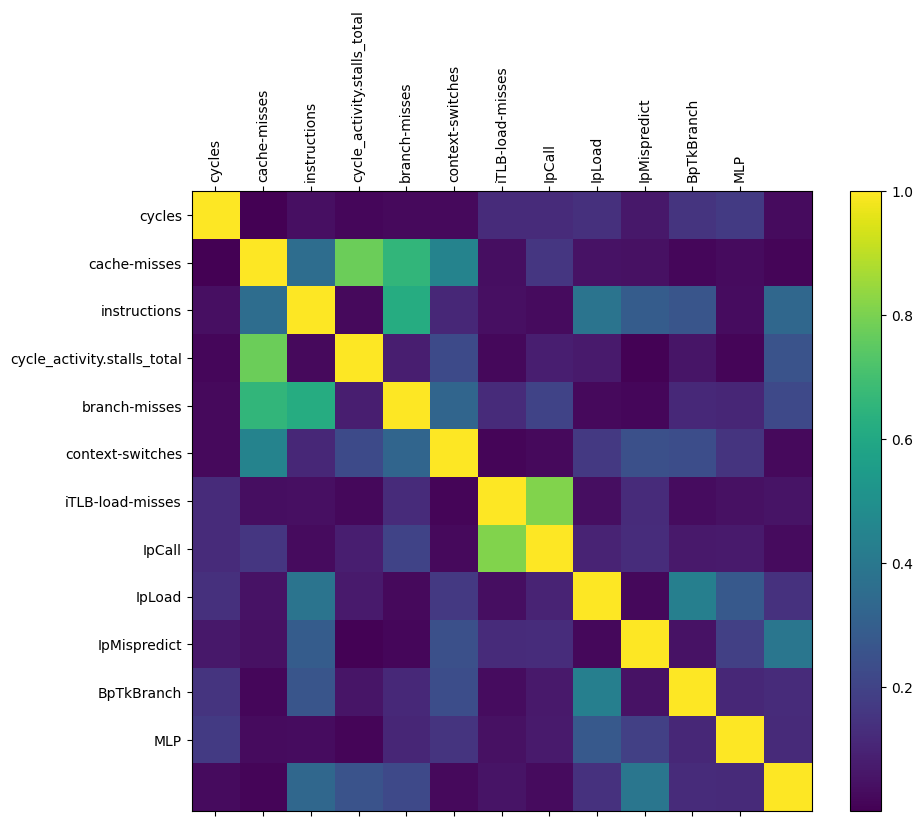

In [79]:
plt.figure(figsize=(10, 10))
plt.matshow(abs(df.loc[:,:'MLP'].corr()), fignum=1)
plt.yticks(np.arange(12), df.columns[1:13])
plt.xticks(np.arange(12), df.columns[1:13], rotation=90)
plt.colorbar(shrink=0.8)

In [80]:
feature_target_corr = df.corr()['SPEC_speed_score'].sort_values(key=lambda x: abs(x))
feature_target_corr.drop('SPEC_speed_score', inplace=True)
feature_target_corr

wkld_503.bwaves_r             -0.000890
wkld_531.deepsjeng_r           0.002136
wkld_557.xz_r                 -0.004974
cycles                        -0.009169
cache-misses                  -0.013057
IpMispredict                  -0.013948
instructions                  -0.019191
wkld_541.leela_r               0.026223
wkld_520.omnetpp_r            -0.026947
wkld_505.mcf_r                -0.027072
wkld_521.wrf_r                -0.031999
wkld_502.gcc_r                 0.035888
IpCall                         0.037040
wkld_526.blender_r             0.041508
wkld_554.roms_r               -0.044485
branch-misses                 -0.047741
wkld_519.lbm_r                 0.054118
MLP                            0.077096
wkld_500.perlbench_r           0.079750
wkld_523.xalancmbk_r           0.090073
cycle_activity.stalls_total    0.093129
wkld_511.povray_r              0.119579
wkld_507.cactuBSSN_r           0.119686
IpLoad                        -0.132813
wkld_510.parest_r              0.144639


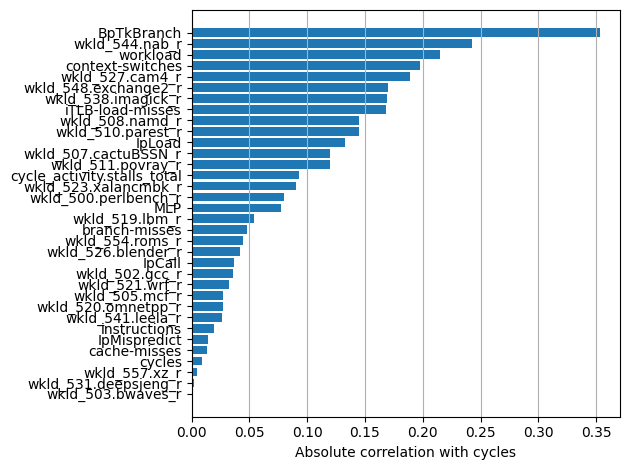

In [81]:
plt.barh(feature_target_corr.index, np.absolute(feature_target_corr.values))
plt.xlabel('Absolute correlation with cycles')
plt.grid(axis = 'x')
plt.tight_layout()
plt.show()

In [82]:
models = ['LR', 'DT', 'RF', 'XGB', 'KNN', 'MLP']
estimator = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), KNeighborsRegressor(),
             MLPRegressor(max_iter=1000)]

score = np.zeros((len(models)))
mae = np.zeros((len(models)))
mse = np.zeros((len(models)))

In [83]:
# for index, value in enumerate(y):
#     if np.isnan(value):
#         print(f"Index of NaN value: {index}")
# df['workload'].fillna(value=df['workload'].mean(), inplace=True)
Xw_train, Xw_test, y_train, y_test = train_test_split(Xw, y, train_size = 50, stratify=df['workload'])
X_train, w_train, X_test, w_test = Xw_train[:,1:], Xw_train[:,0], Xw_test[:,1:], Xw_test[:,0]

X_scaler, y_scaler = StandardScaler().fit(X_train), StandardScaler().fit(y_train)
X_train, y_train = X_scaler.transform(X_train), y_scaler.transform(y_train)
X_test, y_test = X_scaler.transform(X_test), y_scaler.transform(y_test)

In [84]:
for model in range(len(models)):
    e = estimator[model].fit(X_train, y_train.ravel())
    score[model] = e.score(X_test, y_test)
    y_pred = e.predict(X_test)
    mae[model] = mean_absolute_error(y_true=y_test, y_pred=y_pred)
    mse[model] = mean_squared_error(y_true=y_test, y_pred=y_pred)

In [85]:
print('MSE, MAE and R2 score of different models:')
pd.DataFrame({'MSE':mse, 'MAE':mae, 'R2 score':score}, models).sort_values(by=['MSE'])

MSE, MAE and R2 score of different models:


,MSE,MAE,R2 score
RF,0.681440,0.539645,0.256688
XGB,0.736432,0.531143,0.196703
MLP,0.766276,0.566465,0.164149
DT,1.006398,0.556423,-0.097775
KNN,1.064088,0.754003,-0.160702
LR,2.298189,0.799851,-1.506854


[-1.50685449 -0.09777496  0.25668777  0.19670331 -0.16070204  0.16414911]


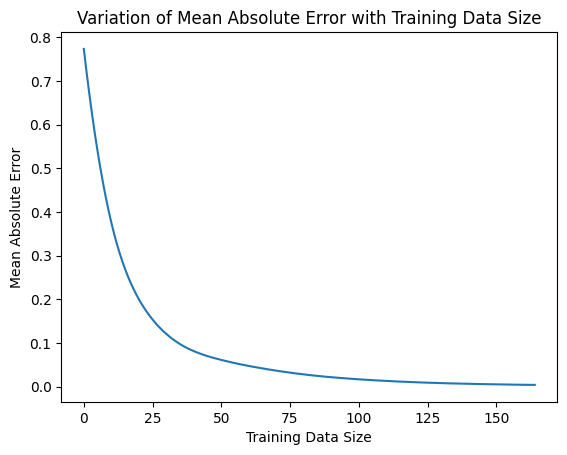

In [86]:
plt.plot(estimator[5].loss_curve_)
plt.xlabel('Training Data Size')
plt.ylabel('Mean Absolute Error')
plt.title('Variation of Mean Absolute Error with Training Data Size')
print(score)

In [87]:
lo, hi, jmp = 10, 501, 10             # training size range
iters = (hi-lo-1)//jmp + 1
score = np.zeros((iters, len(models)))
mae = np.zeros((iters, len(models)))
mse = np.zeros((iters, len(models)))
if lo!=jmp: X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = lo-jmp)
else: X_train, X_test, y_train, y_test = np.zeros((0, 13)), X, np.zeros((0, 1)), y
with open('output.txt', 'w') as file:
  for trs in range(iters):
      X_trainpool, X_test, y_trainpool, y_test = train_test_split(X_test, y_test, train_size = jmp)
      X_train, y_train = np.concatenate((X_train, X_trainpool)), np.concatenate((y_train, y_trainpool))
      X_scaler, y_scaler = StandardScaler().fit(X_train), StandardScaler().fit(y_train)
      X_train, y_train = X_scaler.transform(X_train), y_scaler.transform(y_train)
      X_test, y_test = X_scaler.transform(X_test), y_scaler.transform(y_test)
      print(X_train.shape[0], X_test.shape[0],file=file)
      for model in range(len(models)):
          e = estimator[model].fit(X_train, y_train.ravel())
          score[trs][model] = e.score(X_test, y_test)
          y_pred = e.predict(X_test)
          print(y_test,y_pred,file=file)
          mae[trs][model] = mean_absolute_error(y_true=y_test, y_pred=y_pred)
          mse[trs][model] = mean_squared_error(y_true=y_test, y_pred=y_pred)

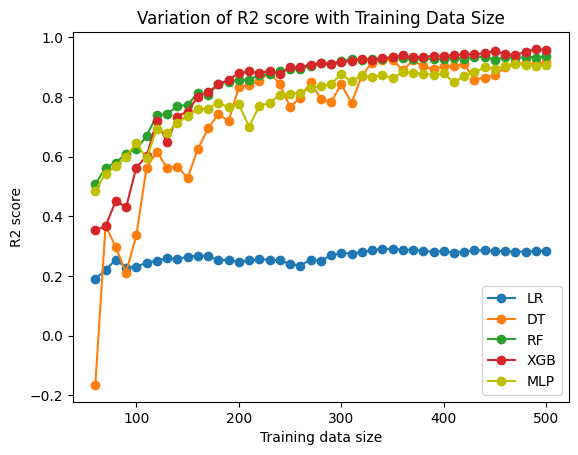

In [88]:
plt.plot(range(60, hi, jmp), score[5:, 0], label=models[0],marker='o')
for model in range(1, 4):
    plt.plot(range(60, hi, jmp), score[5:, model], label=models[model],marker='o')
plt.plot(range(60, hi, jmp), score[5:, 5], label=models[5], color='y',marker='o')
plt.legend()
plt.xlabel('Training data size')
plt.ylabel('R2 score')
plt.title('Variation of R2 score with Training Data Size')
plt.show()

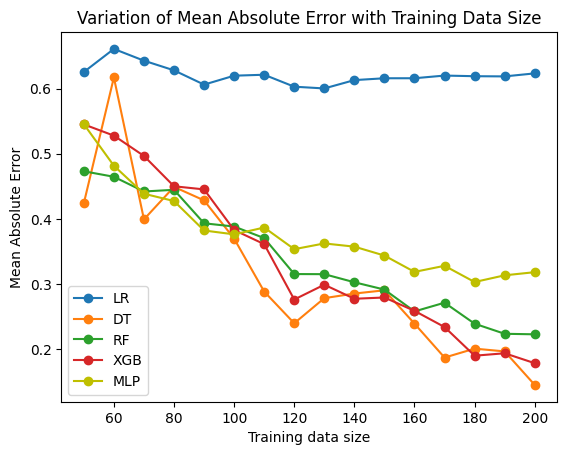

In [89]:
plt.plot(range(50, 201, jmp), mae[4:20, 0], label=models[0],marker='o')
for model in range(1,4):
    plt.plot(range(50, 201, jmp), mae[4:20, model], label=models[model],marker='o')
plt.plot(range(50, 201, jmp), mae[4:20, 5], label=models[5], color='y',marker='o')
plt.legend()
plt.title('Variation of Mean Absolute Error with Training Data Size')
plt.xlabel('Training data size')
plt.ylabel('Mean Absolute Error')
plt.show()